In [108]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

In [88]:
df = pd.read_excel('/kaggle/input/polycystic-ovary-syndrome-pcos/PCOS_data_without_infertility.xlsx', sheet_name = 'Full_new')
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [90]:
df.isnull().any()

Sl. No                    False
Patient File No.          False
PCOS (Y/N)                False
 Age (yrs)                False
Weight (Kg)               False
Height(Cm)                False
BMI                       False
Blood Group               False
Pulse rate(bpm)           False
RR (breaths/min)          False
Hb(g/dl)                  False
Cycle(R/I)                False
Cycle length(days)        False
Marraige Status (Yrs)      True
Pregnant(Y/N)             False
No. of aborptions         False
  I   beta-HCG(mIU/mL)    False
II    beta-HCG(mIU/mL)    False
FSH(mIU/mL)               False
LH(mIU/mL)                False
FSH/LH                    False
Hip(inch)                 False
Waist(inch)               False
Waist:Hip Ratio           False
TSH (mIU/L)               False
AMH(ng/mL)                False
PRL(ng/mL)                False
Vit D3 (ng/mL)            False
PRG(ng/mL)                False
RBS(mg/dl)                False
Weight gain(Y/N)          False
hair gro

In [91]:
df.dropna()
df.drop('Unnamed: 44',axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [92]:
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'],errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'],errors='coerce')

In [93]:
df.corr()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.083578,0.001705,-0.044533,-0.015196,...,0.160834,0.154135,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
Patient File No.,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.083578,0.001705,-0.044533,-0.015196,...,0.160834,0.154135,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
PCOS (Y/N),0.060998,0.060998,1.000000,-0.168513,0.211938,0.068254,0.199534,0.036433,0.091821,0.036928,...,0.286077,0.377933,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),0.067133,0.067133,-0.168513,1.000000,-0.029734,-0.119819,0.021261,-0.010954,0.045831,0.087382,...,-0.032921,-0.037694,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),-0.082823,-0.082823,0.211938,-0.029734,1.000000,0.420098,0.901675,0.072682,0.019983,0.043614,...,0.063983,0.162015,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),-0.011700,-0.011700,0.068254,-0.119819,0.420098,1.000000,-0.006878,0.040825,-0.074339,-0.029459,...,0.061129,0.032418,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,-0.083578,-0.083578,0.199534,0.021261,0.901675,-0.006878,1.000000,0.061939,0.050529,0.061905,...,0.045656,0.159279,-0.080192,0.069491,0.139975,0.142886,0.104204,-0.011610,-0.111522,0.009349
Blood Group,0.001705,0.001705,0.036433,-0.010954,0.072682,0.040825,0.061939,1.000000,0.047572,-0.023766,...,0.039029,-0.035090,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),-0.044533,-0.044533,0.091821,0.045831,0.019983,-0.074339,0.050529,0.047572,1.000000,0.303804,...,-0.003039,0.059804,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),-0.015196,-0.015196,0.036928,0.087382,0.043614,-0.029459,0.061905,-0.023766,0.303804,1.000000,...,0.029242,0.135479,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930


In [94]:
correlation_with_target = df.corr()['PCOS (Y/N)'].abs().sort_values(ascending=False)
print(correlation_with_target)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight (Kg)               0.211938
BMI                       0.199534
Cycle length(days)        0.178480
Hair loss(Y/N)            0.172879
 Age (yrs)                0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Marraige Status (Yrs)     0.112897
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.    

In [95]:
# age group bins and labels
age_grp = [0, 18, 25, 35, 45, float('inf')]
age_lbl = ['<18', '18-25', '26-35', '36-45', '45+']
df['Age group'] = pd.cut(df[' Age (yrs)'], bins = age_grp, labels = age_lbl)

In [96]:
age_group_counts = df.groupby(['Age group', 'PCOS (Y/N)']).size().unstack()
type(age_group_counts)

pandas.core.frame.DataFrame

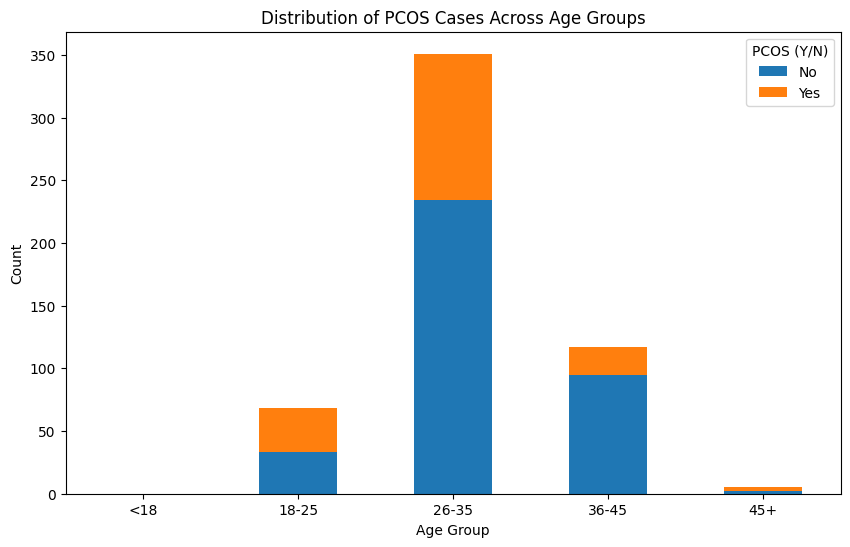

In [97]:
age_group_counts.plot(kind = 'bar', stacked = 'True', figsize = (10, 6))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

In [99]:
top_10_features = correlation_with_target[0:15]
print(top_10_features)

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.377933
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.263863
Weight (Kg)             0.211938
BMI                     0.199534
Cycle length(days)      0.178480
Hair loss(Y/N)          0.172879
 Age (yrs)              0.168513
Name: PCOS (Y/N), dtype: float64


In [100]:
df_new = df[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Skin darkening (Y/N)','hair growth(Y/N)','Weight gain(Y/N)','Cycle(R/I)','Fast food (Y/N)','Pimples(Y/N)','AMH(ng/mL)','Weight (Kg)', 'BMI', 'Cycle length(days)','Hair loss(Y/N)', ' Age (yrs)']]

In [101]:
df_new.isnull().sum()

PCOS (Y/N)              0
Follicle No. (R)        0
Follicle No. (L)        0
Skin darkening (Y/N)    0
hair growth(Y/N)        0
Weight gain(Y/N)        0
Cycle(R/I)              0
Fast food (Y/N)         1
Pimples(Y/N)            0
AMH(ng/mL)              1
Weight (Kg)             0
BMI                     0
Cycle length(days)      0
Hair loss(Y/N)          0
 Age (yrs)              0
dtype: int64

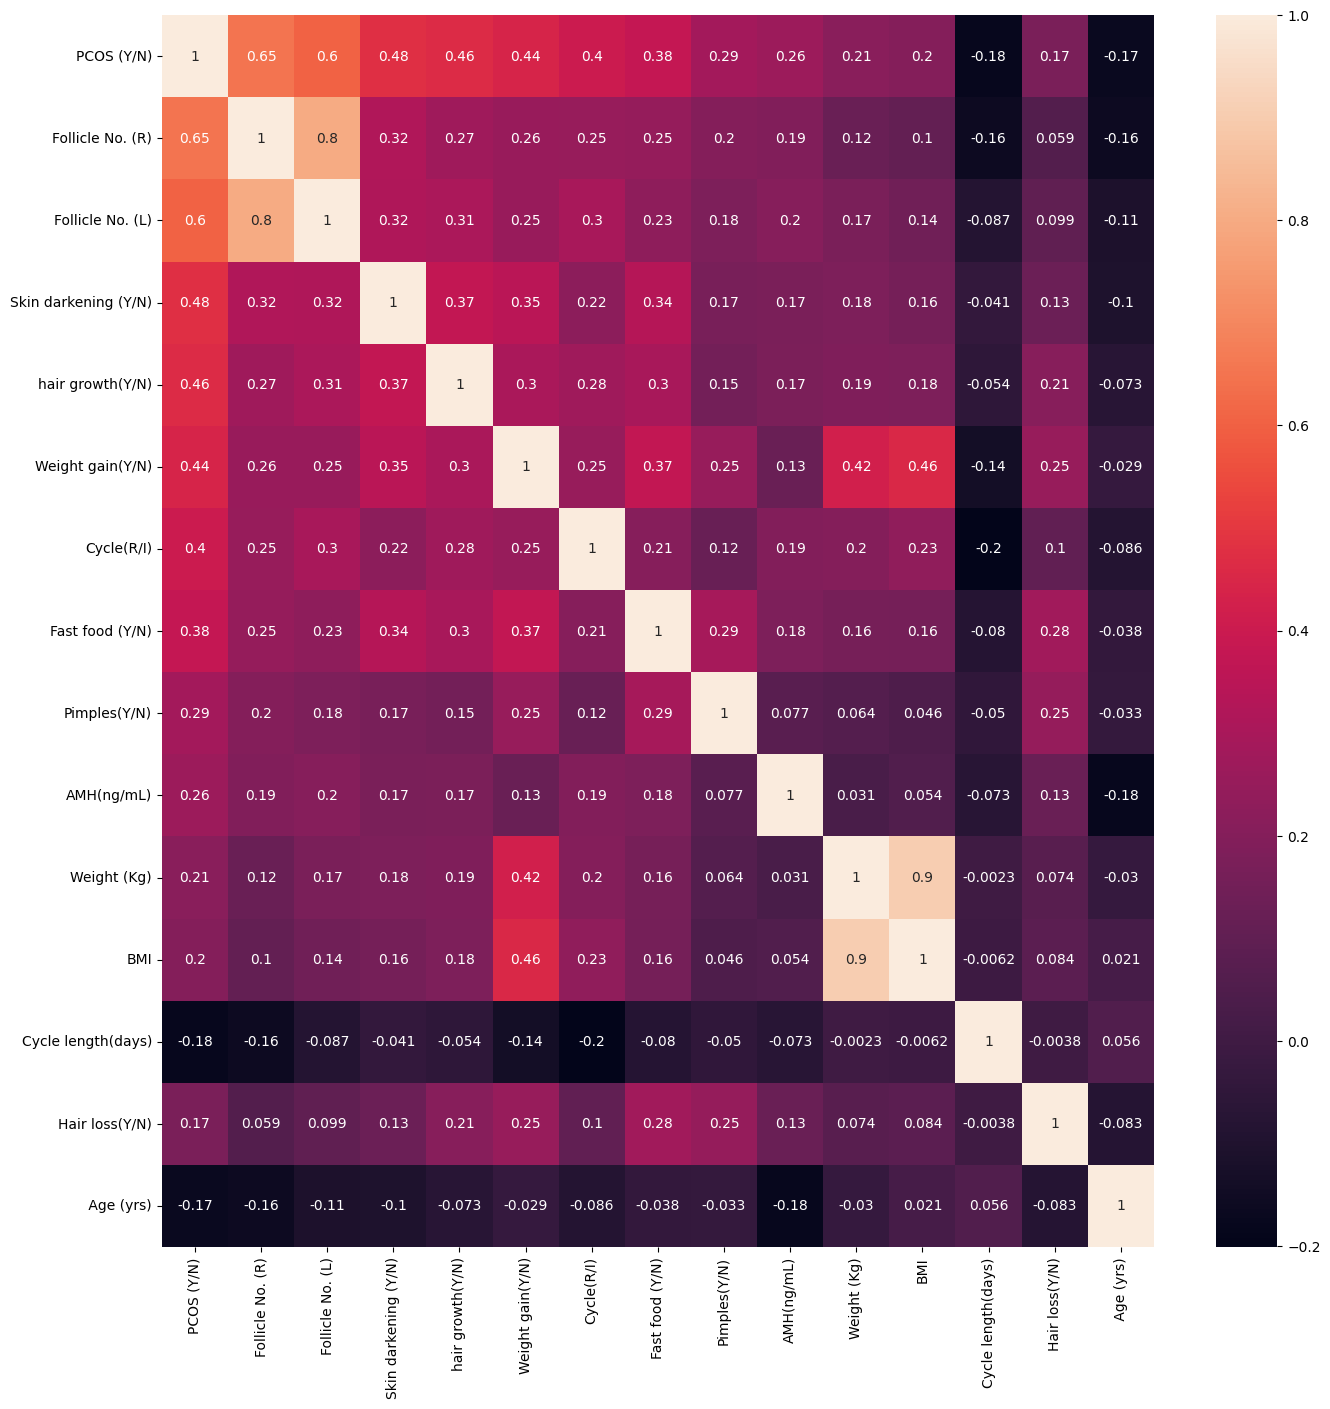

In [103]:
plt.figure(figsize=(16,16))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [104]:
df_new.dropna(inplace=True)

/tmp/ipykernel_32/420984286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace=True)


In [105]:
df_new.isnull().sum()

PCOS (Y/N)              0
Follicle No. (R)        0
Follicle No. (L)        0
Skin darkening (Y/N)    0
hair growth(Y/N)        0
Weight gain(Y/N)        0
Cycle(R/I)              0
Fast food (Y/N)         0
Pimples(Y/N)            0
AMH(ng/mL)              0
Weight (Kg)             0
BMI                     0
Cycle length(days)      0
Hair loss(Y/N)          0
 Age (yrs)              0
dtype: int64

In [106]:
X = df_new.drop(['PCOS (Y/N)'],axis=1)
y = df_new['PCOS (Y/N)']

In [109]:
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [116]:
lgr =LogisticRegression()
lgr.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [118]:
y_pred = lgr.predict(x_test)

In [122]:
accuracy = accuracy_score(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [123]:
print(accuracy)

0.9074074074074074


In [124]:
cnf_matrix

array([[74,  5],
       [ 5, 24]])

In [126]:
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        79
           1       0.83      0.83      0.83        29

    accuracy                           0.91       108
   macro avg       0.88      0.88      0.88       108
weighted avg       0.91      0.91      0.91       108

